In [10]:
import pandas as pd

df = pd.read_csv(r"C:\Users\pc\lesson\machine-learning-zoomcamp-homework\06-decision-tree-and-ensemble-learning\car_fuel_efficiency_1.csv")

df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


The goal of this homework is to create a regression model for predicting the car fuel efficiency (column 'fuel_efficiency_mpg').

In [11]:
df.shape

(9704, 11)

In [12]:
!head car_fuel_efficiency_1.csv


engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
170,3,159,3413.433758606219,17.7,2003,Europe,Gasoline,All-wheel drive,0,13.231728906241411
130,5,97,3149.6649342200353,17.8,2007,USA,Gasoline,Front-wheel drive,0,13.688217435463793
170,,78,3079.03899736884,15.1,2018,Europe,Gasoline,Front-wheel drive,0,14.246340998160866
220,4,,2542.392401828378,20.2,2009,USA,Diesel,All-wheel drive,2,16.91273559598635
210,1,140,3460.870989989018,14.4,2009,Europe,Gasoline,All-wheel drive,2,12.488369121964562
190,3,,2484.883986036068,14.7,2008,Europe,Gasoline,All-wheel drive,-1,17.271818372724237
240,7,127,3006.5422872171457,22.2,2012,USA,Gasoline,Front-wheel drive,1,13.210412112385608
150,4,239,3638.6577802809,17.3,2020,USA,Diesel,All-wheel drive,1,12.848883861524026
250,1,174,2714.219309645285,10.3,2016,Asia,Diesel,Front-wheel drive,-1,16.823553726916543


In [13]:
# Display the first 5 rows
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [14]:
df.info

<bound method DataFrame.info of       engine_displacement  num_cylinders  horsepower  vehicle_weight  \
0                     170            3.0       159.0     3413.433759   
1                     130            5.0        97.0     3149.664934   
2                     170            NaN        78.0     3079.038997   
3                     220            4.0         NaN     2542.392402   
4                     210            1.0       140.0     3460.870990   
...                   ...            ...         ...             ...   
9699                  140            5.0       164.0     2981.107371   
9700                  180            NaN       154.0     2439.525729   
9701                  220            2.0       138.0     2583.471318   
9702                  230            4.0       177.0     2905.527390   
9703                  270            3.0       140.0     2908.043477   

      acceleration  model_year  origin fuel_type         drivetrain  \
0             17.7        2003  

In [15]:
df.describe().round()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,num_doors,fuel_efficiency_mpg
count,9704.0,9222.0,8996.0,9704.0,8774.0,9704.0,9202.0,9704.0
mean,200.0,4.0,150.0,3001.0,15.0,2011.0,-0.0,15.0
std,49.0,2.0,30.0,498.0,3.0,7.0,1.0,3.0
min,10.0,0.0,37.0,953.0,6.0,2000.0,-4.0,6.0
25%,170.0,3.0,130.0,2666.0,13.0,2006.0,-1.0,13.0
50%,200.0,4.0,149.0,2993.0,15.0,2012.0,0.0,15.0
75%,230.0,5.0,170.0,3335.0,17.0,2017.0,1.0,17.0
max,380.0,13.0,271.0,4739.0,24.0,2023.0,4.0,26.0


In [16]:
df.origin.value_counts()

origin
Europe    3254
Asia      3247
USA       3203
Name: count, dtype: int64

In [17]:
df.fuel_type.value_counts()

fuel_type
Gasoline    4898
Diesel      4806
Name: count, dtype: int64

## Preparing the Dataset


- Fill `missing values` with `zeros`.
- Do `train/validation/test split with` `60%/20%/20%` distribution.
- Use the `train_test_split function` and set the `random_state parameter to 1`.
- Use `DictVectorizer(sparse=True)` to turn the dataframes into matrices.

In [18]:

df_fillna = df.fillna(0)
df_fillna                     # Fill missing values with zeros.


,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,0.0,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,0.0,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,0.0,15.101802
9700,180,0.0,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [19]:
from sklearn.model_selection import train_test_split

# Do train/validation/test split with 60%/20%/20% distribution.
# Use the train_test_split function and set the random_state parameter to 1.
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [20]:
df_full_train = df_full_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train["fuel_efficiency_mpg"]
del df_val["fuel_efficiency_mpg"]
del df_test["fuel_efficiency_mpg"]

In [21]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

train_dicts = df_train.to_dict(orient='records')
test_dicts = df_test.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')

dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(train_dicts)
X_test = dv.transform(test_dicts)
X_val = dv.transform(val_dicts)
X_train

array([[1.39000000e+01, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 2.96667950e+03],
       [1.71000000e+01, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.95082212e+03],
       [1.74000000e+01, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 3.07822167e+03],
       ...,
       [1.67000000e+01, 1.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 3.04196459e+03],
       [1.52000000e+01, 1.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 2.45334143e+03],
       [1.41000000e+01, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 2.83389943e+03]])

## Question 1

Let's train a decision tree regressor to predict the `fuel_efficiency_mpg` variable.

Train a model with `max_depth=1`.
Which feature is used for splitting the data?

- 'vehicle_weight'
- 'model_year'
- 'origin'
- 'fuel_type'


In [25]:

from sklearn.tree import DecisionTreeRegressor

# Train a DecisionTreeRegressor model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [26]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import roc_auc_score

[Text(0.5, 0.75, 'vehicle_weight <= 3022.107\nsquared_error = 6.398\nsamples = 5822\nvalue = 14.994'),
 Text(0.25, 0.25, 'squared_error = 2.575\nsamples = 3034\nvalue = 16.882'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'squared_error = 2.453\nsamples = 2788\nvalue = 12.938'),
 Text(0.625, 0.5, '  False')]

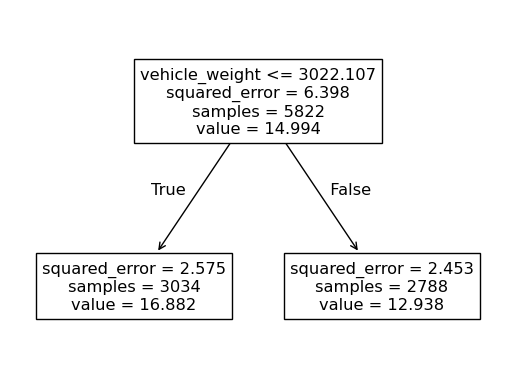

In [73]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)
features_names = dv.get_feature_names_out().tolist()
plot_tree(dt, feature_names=features_names)

# OR

[Text(0.5024476772795321, 0.9827586206896551, 'vehicle_weight <= 3022.107\nsquared_error = 6.398\nsamples = 5822\nvalue = 14.994'),
 Text(0.1857907057673924, 0.9482758620689655, 'vehicle_weight <= 2505.956\nsquared_error = 2.575\nsamples = 3034\nvalue = 16.882'),
 Text(0.34411919152346226, 0.9655172413793103, 'True  '),
 Text(0.05132945191101758, 0.9137931034482759, 'vehicle_weight <= 2069.912\nsquared_error = 1.576\nsamples = 893\nvalue = 18.802'),
 Text(0.012993431541355781, 0.8793103448275862, 'vehicle_weight <= 1823.192\nsquared_error = 1.16\nsamples = 162\nvalue = 20.774'),
 Text(0.0036912411798467235, 0.8448275862068966, 'vehicle_weight <= 1549.208\nsquared_error = 0.87\nsamples = 56\nvalue = 21.871'),
 Text(0.0010403498176261767, 0.8103448275862069, 'vehicle_weight <= 1345.616\nsquared_error = 0.472\nsamples = 13\nvalue = 23.06'),
 Text(0.0006402152723853396, 0.7758620689655172, 'num_doors <= 1.5\nsquared_error = 0.392\nsamples = 4\nvalue = 23.914'),
 Text(0.0004801614542890047,

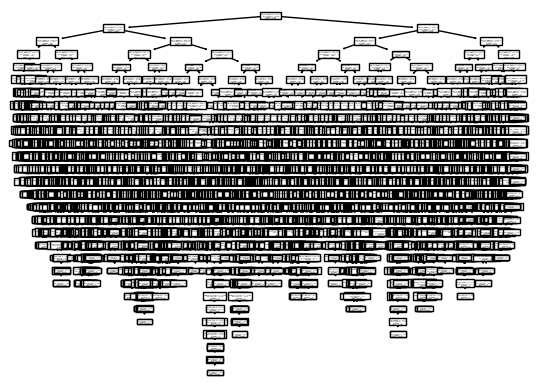

In [31]:
from sklearn.tree import export_text
from sklearn.metrics import roc_auc_score

features_names = dv.get_feature_names_out().tolist()
plot_tree(dt_model, feature_names=features_names)

Answer: `vehicle_weight` is used for splitting the data

In [34]:
import matplotlib.pyplot as plt
from sklearn import tree

In [39]:
# Plot the decision tree
# fig, ax = plt.subplots(figsize=(6, 8))
# tree.plot_tree(dt_model, feature_names=df_train.columns, filled=True, ax=ax)
# plt.show()

[Text(0.5024476772795321, 0.9827586206896551, 'vehicle_weight <= 3022.107\nsquared_error = 6.398\nsamples = 5822\nvalue = 14.994'),
 Text(0.1857907057673924, 0.9482758620689655, 'vehicle_weight <= 2505.956\nsquared_error = 2.575\nsamples = 3034\nvalue = 16.882'),
 Text(0.34411919152346226, 0.9655172413793103, 'True  '),
 Text(0.05132945191101758, 0.9137931034482759, 'vehicle_weight <= 2069.912\nsquared_error = 1.576\nsamples = 893\nvalue = 18.802'),
 Text(0.012993431541355781, 0.8793103448275862, 'vehicle_weight <= 1823.192\nsquared_error = 1.16\nsamples = 162\nvalue = 20.774'),
 Text(0.0036912411798467235, 0.8448275862068966, 'vehicle_weight <= 1549.208\nsquared_error = 0.87\nsamples = 56\nvalue = 21.871'),
 Text(0.0010403498176261767, 0.8103448275862069, 'vehicle_weight <= 1345.616\nsquared_error = 0.472\nsamples = 13\nvalue = 23.06'),
 Text(0.0006402152723853396, 0.7758620689655172, 'num_doors <= 1.5\nsquared_error = 0.392\nsamples = 4\nvalue = 23.914'),
 Text(0.0004801614542890047,

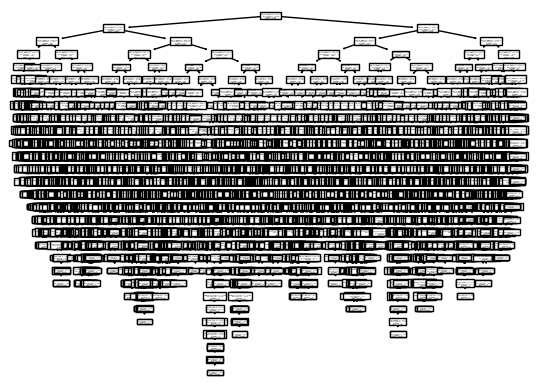

In [38]:
features_names = dv.get_feature_names_out().tolist()
plot_tree(dt_model, feature_names=features_names)

DecisionTreeClassifier(max_depth=1)


In [41]:
# from sklearn.tree import export_text

# print(export_text(dt_model, feature_names=dv.feature_names_))

## Question 2

Train a random forest regressor with these parameters:

- n_estimators=10
- random_state=1
- n_jobs=-1 (optional - to make training faster)


What's the **RMSE** of this model on the **validation data**?

- 0.045
- 0.45
- 4.5
- 45.0

In [29]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)
# rf.predict(X_val).score

,n_estimators,10
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [30]:
y_pred = rf.predict(X_val)

(((y_pred - y_val)**2).mean())**0.5

np.float64(0.4599777557336148)

## Question 3

Now let's experiment with the `n_estimators` parameter

Try different values of this parameter from 10 to 200 with step 10.
Set `random_state` to `1`.
Evaluate the `model` on the `validation dataset`.
After which value of `n_estimators` does `RMSE` stop improving? Consider 3 decimal places for calculating the answer.

- 10
- 25
- 80
- 200


If it doesn't stop improving, use the latest iteration number in your answer.

In [43]:
import numpy as np

n_estimators = np.arange(10, 201, 10)
n_estimators

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_squared_error

rmse = []
for n in n_estimators:
    print(n)
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_val)
    rmse.append(mean_squared_error(y_val, y_pred))

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200


In [36]:
df_scores = pd.DataFrame(data=scores, columns=["n_estimators", "rmse"])

df_scores.assign(
    diff=df_scores.rmse.diff()
)

,n_estimators,rmse,diff
0,10,0.460,NaN
1,20,0.454,-0.006
2,30,0.451,-0.003
3,40,0.448,-0.003
4,50,0.446,-0.002
5,60,0.445,-0.001
6,70,0.445,0.000
7,80,0.445,0.000
8,90,0.445,0.000
9,100,0.444,-0.001


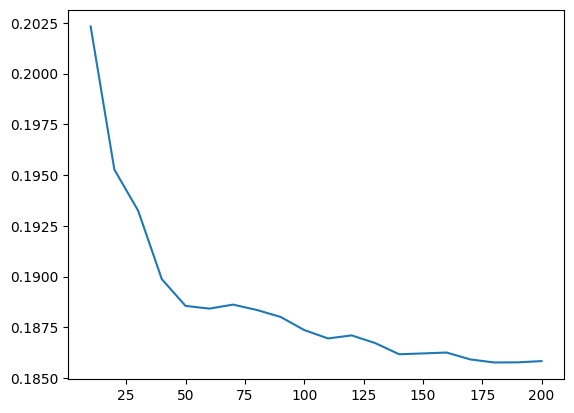

In [56]:
plt.plot(n_estimators, rmse);

## Question 4

Let's select the `best max_depth`:

Try different values of `max_depth`: `[10, 15, 20, 25]`

For each of these values,
try different values of `n_estimators from 10 till 200 (with step 10)

calculate the mean `RMSE`

Fix the `random seed`: `random_state=1`

What's the `best max_depth`, using the `mean RMSE`?


- 10
- 15
- 20
- 25


In [58]:
scores = []
for d in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(max_depth=d, n_estimators=n, random_state=1, n_jobs=-1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        rmse = (((y_pred - y_val)**2).mean())**0.5
        scores.append((d, n, rmse))

df_scores = pd.DataFrame(data=scores, columns=["max_depth", "n_estimators", "rmse"])

In [46]:
df_scores.groupby(by="max_depth")["rmse"].mean().sort_values(ascending=True)


max_depth
10    0.442321
15    0.445060
20    0.445644
25    0.445661
Name: rmse, dtype: float64

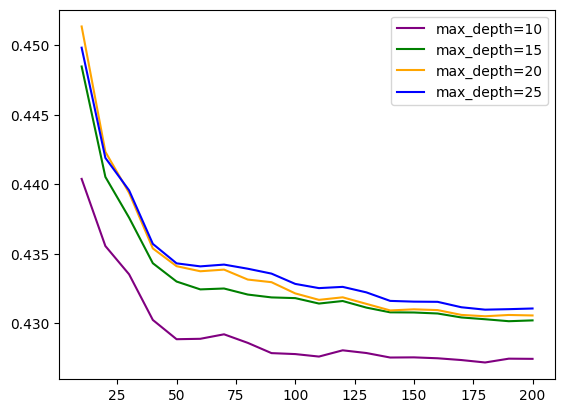

In [60]:
colors = ['purple', 'green', 'orange', 'blue']
max_depths = [10, 15, 20, 25]
for d, c in zip(max_depths, colors) :
  df_subset = df_scores[df_scores['max_depth'] == d]

  plt.plot(df_subset.n_estimators, df_subset.rmse, color= c, label='max_depth=%s' % d)
  plt.legend()

## Question 5

We can extract `feature importance` information from tree-based models.

At each step of the decision tree learning algorithm, it finds the best split. 
    
    When doing it, we can calculate "gain" the reduction in impurity before and after the split. 
    This gain is quite useful in understanding what are the `important features` for tree-based models.

In `Scikit-Learn`, tree-based models contain this information in the `feature_importances_ field`.

For this homework question, we'll find the most important feature:

Train the model with these parameters:
- `n_estimators=10`,
- `max_depth=20`,
- `random_state=1`,
- `n_jobs=-1` (optional).


Get the feature importance information from this model


What's the most important feature (among these 4)?

- `vehicle_weight`
- `horsepower`
- `acceleration`
- `engine_displacement`

In [50]:
rf = RandomForestRegressor(max_depth=20, n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)


pd.DataFrame(index=dv.feature_names_, data=rf.feature_importances_, columns=["feature importance"]).sort_values(by="feature importance", ascending=False)

,feature importance
vehicle_weight,0.959162
horsepower,0.016040
acceleration,0.011471
engine_displacement,0.003269
model_year,0.003182
num_cylinders,0.002359
num_doors,0.001591
origin=USA,0.000555
origin=Europe,0.000520
origin=Asia,0.000476


## Question 6

Now let's train an XGBoost model! For this question, we'll tune the eta parameter:

    * Install XGBoost
    * Create DMatrix for train and validation
    * Create a watchlist
    * Train a model with these parameters for 100 rounds:
    
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
Now change `eta` from 0.3 to 0.1.

Which `eta` leads to the best `RMSE` score on the validation dataset?

- `0.3`
- `0.1`
- `Both give equal value`


In [67]:
# install XGBoost
!pip install xgboost

In [68]:
import xgboost as xgb

In [70]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features_names)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=features_names)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features_names)

In [71]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}
watchlist = [(dtrain, 'train'), (dval, 'val')]
model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist, verbose_eval=10)
     

[0]	train-rmse:1.81284	val-rmse:1.85421
[10]	train-rmse:0.36431	val-rmse:0.43548
[20]	train-rmse:0.33213	val-rmse:0.43000
[30]	train-rmse:0.31312	val-rmse:0.43431
[40]	train-rmse:0.29458	val-rmse:0.43555
[50]	train-rmse:0.27552	val-rmse:0.43879
[60]	train-rmse:0.26321	val-rmse:0.44126
[70]	train-rmse:0.24635	val-rmse:0.44334
[80]	train-rmse:0.23449	val-rmse:0.44529
[90]	train-rmse:0.22226	val-rmse:0.44750
[99]	train-rmse:0.21158	val-rmse:0.44869


In [72]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}
watchlist = [(dtrain, 'train'), (dval, 'val')]
model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist, verbose_eval=10)
     

[0]	train-rmse:2.28913	val-rmse:2.34556
[10]	train-rmse:0.90421	val-rmse:0.93576
[20]	train-rmse:0.47861	val-rmse:0.52495
[30]	train-rmse:0.37410	val-rmse:0.43957
[40]	train-rmse:0.34791	val-rmse:0.42734
[50]	train-rmse:0.33506	val-rmse:0.42502
[60]	train-rmse:0.32695	val-rmse:0.42455
[70]	train-rmse:0.32059	val-rmse:0.42542
[80]	train-rmse:0.31417	val-rmse:0.42579
[90]	train-rmse:0.31048	val-rmse:0.42671
[99]	train-rmse:0.30525	val-rmse:0.42688
